**IMPORTING DATA**   Name: Food Oracle - Recipe Recommender


In [ ]:
# Spoonacular API Call 🥄🥄🥄

import requests
import json
import random
from IPython.display import Image, display

BASE_URL = 'https://api.spoonacular.com/recipes/complexSearch'
API_KEY = '2e95f541d94949ab81e14de02fa6bd57'

# API keys
# 1) ec751b9aed1a4807a881cb83ae6d3b98 (umich)
# 2) 9688e7ca45c54295b7081460d3a8b794 (gmail)
# 3) 5f7ebbf125c34db78eabf4e23ea538c1 (icloud)
# 4) 2e95f541d94949ab81e14de02fa6bd57 (braxton)

# params = {'apiKey' : API_KEY,'query': 'pasta'} #Example with pasta

In [ ]:
# 📦 Setup cell to make print() wrap text in Colab !! Got this from Colleen in lecture
import builtins, textwrap

def wrapped_print(*args, width=80, **kwargs):
    """
    Works just like the normal print(), but long text
    will automatically wrap to the given width.
    """
    new_args = [textwrap.fill(str(a), width=width) for a in args]
    builtins.print(*new_args, **kwargs)

# Replace the default print with our wrapped version
print = wrapped_print

print("✅ Print has been updated! Long lines will now wrap automatically.")

✅ Print has been updated! Long lines will now wrap automatically.


Pasta example (do not uncomment)

In [ ]:
# # Pasta example code

# response = requests.get(BASE_URL, params=params)
# data = response.json()

# print(data)

**PROJECT** 🍂😄

**FUNCTIONS...**

In [ ]:
# Assigning key recipe words in a dict to a set of moods:

def mood_mapper(mood):
  mood_keywords = {
      'happy' : ['dessert','fruit','citrus','banana','berry','cheeseburger','taco'],
      'sad' : ['soup','chocolate','alcohol','rich','cream','pie','casserole'],
      'angry' : ['spicy','hot','tangy','pepper','chili','noodles','stirfry'],
      'romantic' : ['pasta','chocolate','wine','steak','lobster','lasagna'],
      'neutral' : ['simple','clean','chicken','vanilla'],
      'scared' : ['comfort','tea','warm','yogurt','blueberry'],
      'tired' : ['simple','basic','lazy','bowl'],
  }
  return mood_keywords.get(mood.lower())

In [ ]:
# Assigning key recipe words in a dict to each season:

def season_mapper(season):
  season_keywords = {
      'winter' : ['cookie','stew','holiday','christmas','chestnut','milk','coffee'],
      'spring' : ['fresh','salad','vegetable','fruit','carrot','bean','turnip'],
      'summer' : ['barbeque','fish','lemon','ice','ice cream','cherry','peach'],
      'fall' or 'autumn' : ['pumpkin','turkey','apple','candy','pecan','sweet potato','walnut']
  }
  return season_keywords.get(season.lower())

In [ ]:
# Loading in Spoonacular recipe data

def recipe_data_finder(keywords):
    url = (f'{BASE_URL}')

    params = {
        "query": keywords,
        "number": 3,
        "apiKey": API_KEY
    }

    response = requests.get(url, params=params)
    # print(keywords)
    # print(response.status_code)

    if response.status_code == 200:
        data = response.json()
        return data

    else:
        print(f"Error")
        return []

# Test...
# print(recipe_data_finder('cookie'))

In [ ]:
# # TEST CELL FOR API KEY !!! DO NOT RUN

# url = (f'{BASE_URL}')

# params = {
#     "query": 'Carrot',
#     "number": 1,
#     "apiKey": API_KEY
#     }

# response = requests.get(url, params=params)
# print(response.status_code)
# if response.status_code == 200:
#   data = response.json()
#   print(data)
# else:
#     print(f"Error")

In [ ]:
# Function to represent data

def show_recipe_info(results):

    recipe = results["results"][0]
    id = recipe["id"]
    title = recipe["title"]
    return (recipe, id, title)

# Test...
# results = recipe_data_finder('meat')
# print(show_recipe_info(results))

In [ ]:
# Basic workflow of the project, grabbing recipe data

def user_mood_season_input():
  keywords = []

  print('The available moods for FOOD ORACLE are: happy, sad, angry, romantic, neutral, scared, and tired.')
  print('\n')
  user_input_mood = input('Enter your current mood: ').lower()
  print('\n')
  moodkw = mood_mapper(user_input_mood)
  if moodkw is None:
    print('Not an applicable mood.')
    return('Please try again.')
  else:
    keywords.append(moodkw)
  # print(','.join(keywords).title()) -- Test


  user_input_season = input('Enter the current season: ').lower()
  seasonkw = season_mapper(user_input_season)
  if seasonkw is None:
    print('That is not a season.')
    return('Please try again.')
  else:
    keywords.append(seasonkw)

  keywords = keywords[0] + keywords[1] # Combining mood and season lists
  # print(keywords) -- Test

  randomizer = [] # Randomizing keywords from combined list

  options = random.sample(keywords, k=3)
  # print(options) -- Test
  for option in options:
    recipe_data = recipe_data_finder(option)
    recipes = recipe_data['results']
    first_recipe = recipes[0]
    randomizer.append(first_recipe)

  return randomizer

  # Previous unrandomized code:
  # keywords = keywords[0] + keywords[1]
  # # keywords = (', '.join(keywords).lower())
  # random_num = random.randint(0,len(keywords)-1)
  # option = keywords[random_num]

  # return(recipe_data_finder(option))

recipes_list = (user_mood_season_input())
# print(recipes_list)


The available moods for FOOD ORACLE are: happy, sad, angry, romantic, neutral,
scared, and tired.

Enter your current mood: sad

Enter the current season: winter


In [ ]:
# Pretty printing user's selected recipes and assigning images

def pretty_print_recipes(recipes):

  recipe_num_counter = 0
  for recipe in recipes:
    # Recipe 1: Red Lentil Soup with Chicken and Turnips -- Example
    recipe_num_counter += 1
    print(f'Recipe {recipe_num_counter}: {recipe['title']}')
    img_url = recipe['image']
    display(Image(img_url, width=200))

# pretty_print_recipes(recipes_list) -- Test

Which recipe would you like to make? You must select one.
Enter your selected number: 3
Fish Pie With Fresh and Smoked Salmon
Source URL: https://www.foodista.com/recipe/ZCCMVDXR/fish-pie-with-fresh-and-
smoked-salmon
Recipe summary: The recipe Fish Pie With Fresh and Smoked Salmon can be made
<b>in about 45 minutes</b>. One serving contains <b>725 calories</b>, <b>47g of
protein</b>, and <b>27g of fat</b>. For <b>$11.0 per serving</b>, this recipe
<b>covers 54%</b> of your daily requirements of vitamins and minerals. This
recipe serves 2. This recipe from Foodista has 3 fans. A mixture of bay leaf,
olive oil, chives, and a handful of other ingredients are all it takes to make
this recipe so scrumptious. It is a good option if you're following a <b>gluten
free and pescatarian</b> diet. With a spoonacular <b>score of 92%</b>, this dish
is awesome. Similar recipes include <a
href="https://spoonacular.com/recipes/potted-fresh-smoked-salmon-210891">Potted
fresh & smoked salmon</a>, <a href

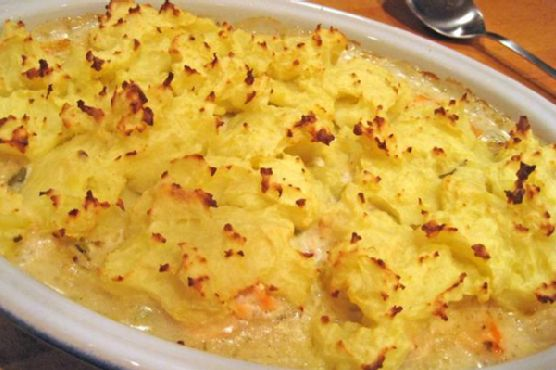

In [ ]:
def favorite_recipe(recipes):

# User chooses favorite recipe
# We want to show user title, image, sourceURL, and summary of chose recipe.

# Which recipe would you like more information about? You must select one.
# Choose between 1, 2, or 3
# Return summary of the dish


  print('Which recipe would you like to make? You must select one.')
  user_input_choice = input('Enter your selected number: ')

  chosen_id = ''
  if user_input_choice == '1':
    chosen_id = recipes[0]['id']
  elif user_input_choice == '2':
    if len(recipes) < 2: # In case they have a dietary restriction
      print('Invalid number chosen.')
      return
    else:
      chosen_id = recipes[1]['id']
  elif user_input_choice == '3':
     if len(recipes) < 3: # In case they have a dietary restriction
      print('Invalid number chosen.')
      return
     else:
      chosen_id = recipes[2]['id']
  else:
    print('Please pick a vaild number.')
    return

  # SECOND API call to get more recipe-specfic information 😄

  INFO_URL = (f'https://api.spoonacular.com/recipes/{chosen_id}/information')

  url = (f'{INFO_URL}')
  # print(url)

  params = {
        "apiKey": API_KEY
    }

  response = requests.get(url, params=params)

  # print(response.status_code) -- Test if API fails, see what problem is
  if response.status_code == 200:
      recipe_data = response.json()
      # return recipe_data
  else:
      print(f"Error")
      return []

  print(recipe_data['title'])
  print(f'Source URL: {recipe_data['sourceUrl']}')
  print(f'Recipe summary: {recipe_data['summary']}')
  img_url = recipe_data['image']
  display(Image(img_url, width=200))

  return

(favorite_recipe(recipes_list))

In [ ]:
# Limiting options if user has dietary restriction

def ask_diet_choice():
  #asking the user if they have dietary restrictions
  print('\n')
  print("Do you have any dietary restrictions?")
  print("Options: none, vegan, vegetarian, gluten free, dairy free, nut allergy")

  #keep asking until the user gives a valid dietary choice
  while True:
    diet = input("Enter your choice: ").strip().lower()
    #acceptable responses
    if diet in ["none", "vegan", "vegetarian", "gluten free", "dairy free", "nut allergy"]:
      return diet
    #if input is invalid, prompt the user again
    else:
      print("Please type one of: none, vegan, vegetarian, gluten free, dairy free, nut allergy.")

def contains_keyword(title, word_list):
  #check if any keyword from word_list appears in one of the recipe titles
  for word in word_list:
    if word in title:
      return True
  return False

def filter_recipes_by_diet(recipes, diet_choice):
  #if the user has no dietary restrictions, return all recipes
  if diet_choice == "none":
    return recipes
  filtered = []

  #keyword lists for each restriction category
  meat_words = ["chicken", "beef", "pork", "bacon", "ham", "shrimp", "fish", "steak", "turkey", "sausage"]
  dairy_words = ["cheese", "milk", "cream","butter", "yogurt", "ice cream"]
  gluten_words = ["bread", "pasta", "noodle", "flour", "bun", "bagel", "cracker", "tortilla"]
  nut_words = ["nut", "walnut", "pecan", "almond", "cashew", "peanut", "pistachio", "hazelnut"]

  #loop through each recipe and check whether it violates the restriction
  for recipe in recipes:
    #get recipe title and convert to lowercase for consistent matching
    title = str(recipe.get("title", "")).lower()
    #check if the recipe contains restricted ingredients
    has_meat = contains_keyword(title, meat_words)
    has_dairy = contains_keyword(title, dairy_words)
    has_gluten = contains_keyword(title, gluten_words)
    has_nuts = contains_keyword(title, nut_words)

    #tell the code to assume to keep the recipe unless it violates the user's specified dietary restriction
    keep = True

    #going through all the potential options and telling the code what to cut out based on the restriction
    if diet_choice == "vegan":
      if has_meat or has_dairy:
        keep = False
    elif diet_choice == "vegetarian":
      if has_meat:
        keep = False
    elif diet_choice == "gluten free":
      if has_gluten:
        keep = False
    elif diet_choice == "dairy free":
      if has_dairy:
        keep == False
    elif diet_choice == "nut allergy":
      if has_nuts:
        keep = False
    #if the recipe passed all these checks, then add it to the filtered list
    if keep:
      filtered.append(recipe)

  #if nothing matched, tell the user and return all the recipes as a fallback
  if len(filtered) == 0:
    print("No recipes matched your dietary need. Showing all instead.")
    return recipes
  return filtered

Welcome to FOOD ORACLE, the recipe recommender!

Enter your current mood and season to get a specially tailored recipe!

Would you like to quit? If so, type 'stop.' Else, type 'continue.' continue


The available moods for FOOD ORACLE are: happy, sad, angry, romantic, neutral,
scared, and tired.

Enter your current mood: happy

Enter the current season: summer


Do you have any dietary restrictions?
Options: none, vegan, vegetarian, gluten free, dairy free, nut allergy
Enter your choice: none
Recipe 1: Fish Pie With Fresh and Smoked Salmon


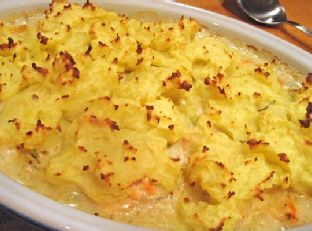

Recipe 2: Grilled Fish Tacos with Spicy Tequila-Lime Guacamole


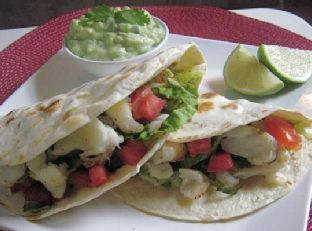

Recipe 3: Bluebird


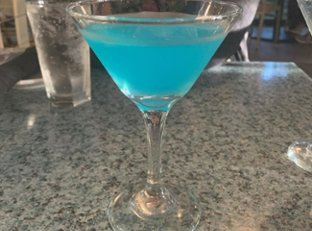

Which recipe would you like to make? You must select one.
Enter your selected number: 3
Bluebird
Source URL: https://www.thecocktaildb.com/drink/11120
Recipe summary: Bluebird could be just the <b>gluten free and dairy free</b>
recipe you've been looking for. This recipe makes 1 servings with <b>198
calories</b>, <b>0g of protein</b>, and <b>0g of fat</b> each. For <b>$2.55 per
serving</b>, this recipe <b>covers 1%</b> of your daily requirements of vitamins
and minerals. A mixture of twist of lemon peel, triple sec, maraschino cherry,
and a handful of other ingredients are all it takes to make this recipe so
scrumptious. It works well as a reasonably priced beverage. It is brought to you
by spoonacular user <a href="/profile/drinkhero">drinkhero</a>. From preparation
to the plate, this recipe takes approximately <b>approximately 45 minutes</b>.
Users who liked this recipe also liked .


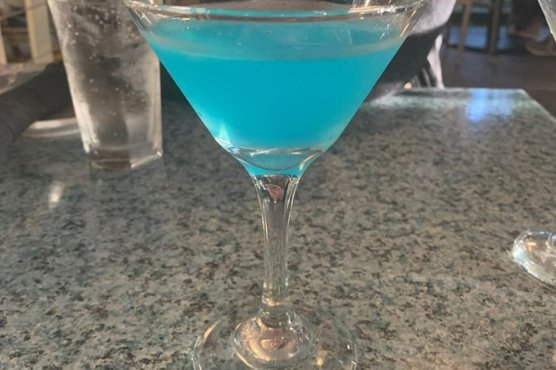


Please type either 'stop' or 'continue.'
Would you like to quit? If so, type 'stop.' Else, type 'continue.' stop


Thank you for using FOOD ORACLE!


In [ ]:
# Main function flow

if __name__ == '__main__':
    print("Welcome to FOOD ORACLE, the recipe recommender!")
    print('\n')
    print('Enter your current mood and season to get a specially tailored recipe!')
    print('\n')

    while True:
      stop_button = input("Would you like to quit? If so, type 'stop.' Else, type 'continue.' ")
      print('\n')
      if stop_button == 'stop':
        print('\n')
        print('Thank you for using FOOD ORACLE!')
        break

      if stop_button == 'continue':
        print('\n')
        user_intro_input = user_mood_season_input()
        if user_intro_input == 'Please try again.': # If user inputs invalid season/mood
          print('Please try again with a valid input.')
          break
        print('\n')
        diet = ask_diet_choice()
        user_intro_input = filter_recipes_by_diet(user_intro_input, diet)
        nice_input = pretty_print_recipes(user_intro_input)
        favorite_recipe(user_intro_input)


      if stop_button != 'stop' or 'continue':
        print('\n')
        print("Please type either 'stop' or 'continue.'")

Final Project Rubric — Self-Grading
1. Data Source Access (10 pts)
Description: Program reads data successfully from an API or file.

10 pts – Loads correctly with minimal setup; no crashes; source clearly identified.
8 pts – Loads successfully with minor setup issues.
6 pts – Works only under certain conditions or partially hardcoded.
3–0 pts – Fails to retrieve data or uses hardcoded values only.

Your Score & Why:
10 points because we have clearly identified our spoonacular API source and retrieved data from it with no issues or crashes.



2. Data Use & Display (10 pts)
Description: Data retrieved is meaningfully used and displayed.

10 pts – Data processed or summarized clearly (filtered, counted, visualized); output is relevant and easy to read.
8 pts – Output mostly clear but limited or repetitive.
6 pts – Output messy or unclear connection to user choice.
3–0 pts – Minimal or incorrect display.

Your Score & Why: 10 because we have a specific function (pretty_print_recipes) to ensure that our output is clear, relevant, and easy to find. We have pictures with our output and titles that are easy to read and understand.




3. Code Structure, Functions, & Comments (10 pts)
Description: Code is modular, readable, and well-commented.

10 pts – Organized with main() and helper functions; each function clear; comments explain purpose and logic; descriptive variable names.
8 pts – Functions mostly clear; some missing comments.
6 pts – Limited structure or few comments.
3–0 pts – Unstructured code; no comments.

Your Score & Why: 10 because we used a main() function-ish in the main function flow (the last code box). We commented our entire code to ensure that it's to understand and we have clear names to understand what we want each variable to mean or each function to do like "user_mood_season_input" or "def ask_diet_choice".




4. Loops & Conditionals (7.5 pts)
Description: Demonstrates iteration and logic appropriately.

7.5 pts – At least 3 loops and 4 if-statements used effectively; clear, efficient logic.
6 pts – Meets minimums with mostly clear logic.
4.5 pts – Some errors or redundancy.
3–0 pts – Missing or incorrect logic.

Your Score & Why: 7.5 as we have 4 loops and many if statements (way more than 4). All of these statements were used clearly and efficiently since they help the code's purpose (like going through each of the words and seeing if they are part of a dietary restriction or saying that IF a word is part of a list with meat words or dairy words, then it will be added to a filtered list) while still being done in a fair amount of lines/not overdoing it.




5. Use of Lists and Dictionaries (7.5 pts)
Description: Effective use of lists and/or dictionaries to store and process data.

7.5 pts – Used appropriately and efficiently; good use of list/dict methods.
6 pts – Used but not consistently or optimally.
4.5 pts – Minimal or hardcoded use.
3–0 pts – Little or no evidence of use.

Your Score & Why: 6 because I think we did use dictionaries and lists well, but there aren't many throughout the code. There are quite a few lists for the keywords and to filter through dietary restrictions but there aren't many dictionaries and dictionaries really only appear in the beginning to connect food with seasons and moods and for params.  




6. Self-Grading & Reflection (5 pts)
Description: Overall, I think we did pretty well in terms of creating the code and not going overboard with how many lines we had and what we were doing. We had a goal and used the code efficiently to complete that goal. We didn't use many dictionaries, and I think we could've gone more in depth in that sense which is why I gave a 6/7.5 for that category. Besides that, we fit all the requirements and commented our code as well as neatly displayed our data and accessed our source with no issues.

I honestly learned a lot about how to be even more detailed with my code because of how we had to connect with the API. Since we had to provide so many keywords, it took a while to understand how to perform keyword based filtering successfully and how to think about what words to utilize to ensure that our code is working correctly and nothing is falling through the cracks. I think our end product was relatively successful!

